In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [23]:
# Load CSV into DataFrame
df = pd.read_csv("sales_dataset.csv")

# Connect to SQLite (this will create a file if it doesn't exist)
connection = sql.connect("sales_dataset.db")

# Write DataFrame to SQL table
df.to_sql("Sales_dataset", connection, if_exists="replace", index=False)

# Now run your query
query = """
SELECT ProductName, 
       SUM(Quantity) AS total_qty, 
       SUM(Quantity * Price) AS revenue
FROM Sales_dataset
GROUP BY ProductName
"""
result_df = pd.read_sql_query(query, connection)


In [24]:
result_df.head()

,ProductName,total_qty,revenue
0,Headphones,10,5910.0
1,Keyboard,25,10095.0
2,Laptop,25,11690.0
3,Mobile Phone,20,9806.0
4,Monitor,48,21620.0


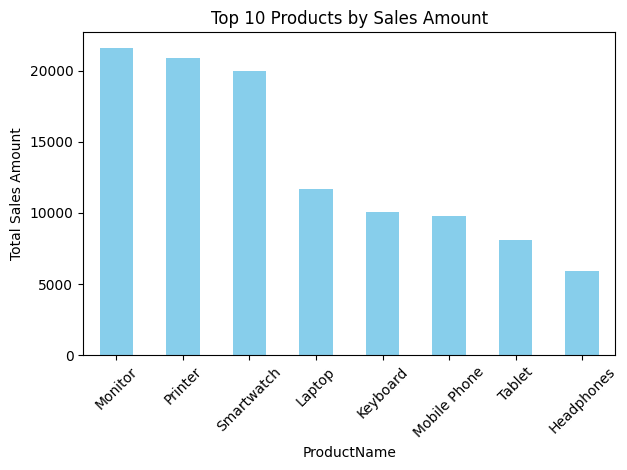

In [31]:
# Group by ProductName, sum SalesAmount, sort, and get top 10
top_products = (df.groupby("ProductName")["SalesAmount"].sum().reset_index().sort_values(by="SalesAmount", ascending=False).head(10))

# Plot bar chart
top_products.plot(kind="bar", x="ProductName", y="SalesAmount", legend=False, color="skyblue")
plt.ylabel("Total Sales Amount")
plt.title("Top 10 Products by Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()